# ASSIGNMENT 1

Nama : Muhammad Rafi Ramadhan (PYTN-KS12-002)

Lakukan penginstallan library library yang akan di gunakan dalam assignment kali ini

Kemudian Import library yang akan digunakan kedalam notebook

In [2]:
#IMPORT LIBRARIES
#untuk pemrosesan data
import numpy as np
import pandas as pd
import requests

#untuk mencari lattitude dan longitude setiap wilayah
import geopandas as gpd
from geopy.geocoders import Nominatim

#membuat peta
import folium
from folium import plugins

#untuk keperluan plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

#analisis statistik
from scipy import stats
import scipy.stats as stats

# untuk membuat wordcloud
from wordcloud import WordCloud

## Data Preparation

Melakukan pembacaan datasheet yang dimiliki lalu melakukan pengecekan isi serta masing masing elemen dari masing-masing kolom.

In [55]:
data = pd.read_csv("E:\Kuliah\Semester 6\Hacktiv8\london_crime_by_lsoa.csv", dtype={'year':str, 'month':str})

data.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Catatan: <br>
lsoa_code      : ini mewakili area kepolisian <br>
Borough        : Wilayah London yang terkait dengan statistik <br>
major_category : kategori kejahatan utama <br>
minor_category : kategori kejahatan ringan <br>
value          : Jumlah kejahatan untuk wilayah tertentu, pada bulan tertentu <br>
year           : Tahun statistik ringkasan <br>
month          : bulan statistik ringkasan <br>


In [4]:
#Menampilkan nilai kolom 

data.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [5]:
len(data)

13490604

In [6]:
#Mengetahui bentuk data
data.shape

(13490604, 7)

In [53]:
#Melihat Gambaran dasar dari data 
data.describe(include = 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180
month,13490604,12,11,1124217


In [54]:
#Mengecek apakah ada missing value
print(data.select_dtypes(include=['object']).isnull().sum())

lsoa_code         0
borough           0
major_category    0
minor_category    0
month             0
dtype: int64


In [9]:
#Mengecek daftar tahun
print(sorted(data['year'].unique()))

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


## Question

1. Apa kategori kejahatan utama (Major Category) yang paling banyak di London dari tahun 2008 sampai 2016 dan berapa jumlahnya?
2. Wilayah mana yang memiliki jumlah kasus kejahatan paling banyak?
3. Apakah jenis kasus Minor Category yang paling banyak di London dari tahun 2008 sampai 2016?
4. Pada tahun berapa dalam rentang 2008 sampai 2016 kota london mengalami kejahatan paling banyak?
5. Bagaimana tren total kasus kejahatan major di London dari 2008 sampai 2016?

## Pie Chart

In [10]:
#subset data berdasarkan major catagory
datakasus = data.groupby('major_category', axis = 0).sum()
datakasus.sort_values(by = 'value', ascending = False)

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


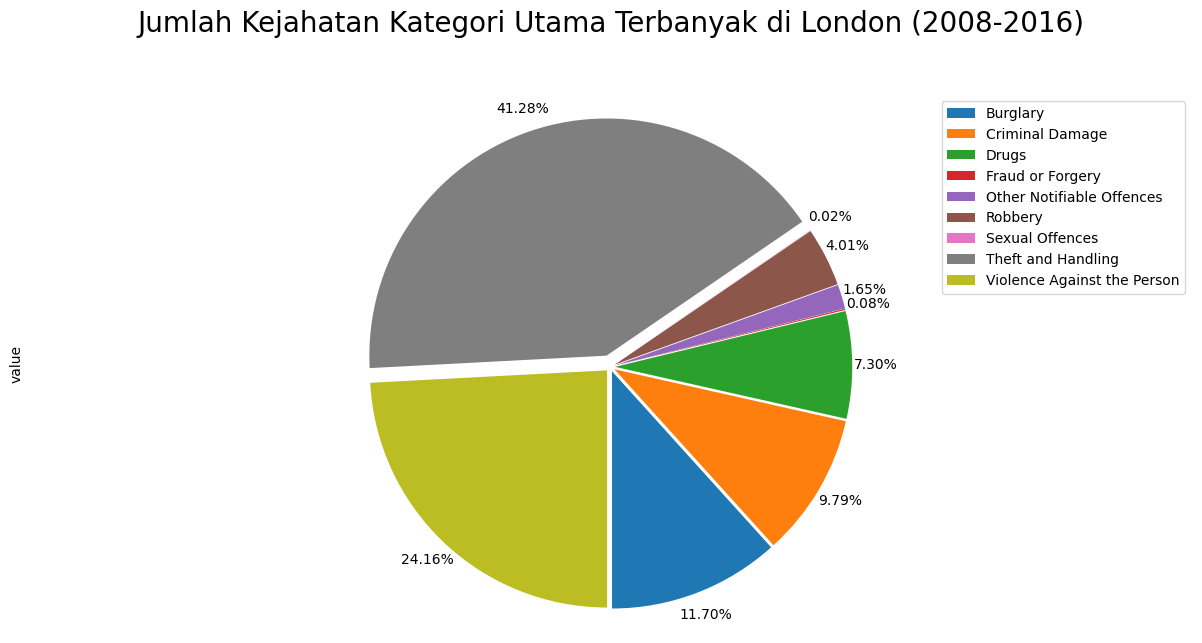

In [11]:
#Membuat pie chart
datakasus['value'].plot(kind ='pie',
                        figsize = (15,7),
                        autopct = '%.2f%%',
                        startangle = 270, #menentukan posisi sektor-sektor lingkaran pie chart
                        labels = None,
                        pctdistance = 1.1, #jarak persentase data dari tengah lingkaran
                        explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.05, 0.02)
                       )
plt.title("Jumlah Kejahatan Kategori Utama Terbanyak di London (2008-2016)", y = 1.1, fontsize=20)
plt.axis('equal')
plt.legend(labels = datakasus.index, loc = 'best')
plt.show()

Berdasarkan Pie chart diatas dapat dilihat bahwa kejahatan dengan jumlah paling banyak pada kasus major category menurut data london crime pada tahun 2008-2016 adalah Theft and Handling dengan persentase 41.3% (atau sejumlah 2.661.861 kasus), dan diikuti Violence Against the Person yang mengambil tempat kedua dengan persentase 24.2% (atau sejumlah 1.558.081 kasus). Sedangkan untuk yang paling sedikit adalah Sexual Offences dengan presentase 0.02% (atau sejumlah 1.273 kasus).

## Folium Maps 

In [12]:
#subset data berdasarkan borough
total_crimes_by_borough = data.groupby('borough')['value'].sum().reset_index()
total_crimes_by_borough.sort_values(by = 'value', ascending = False)

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551


In [13]:
# setting latitude and longitude for London Maps
london_lattitude = 51.509865
london_longitude = -0.118092

# Instansiasi objek Folium.Map
london_map = folium.Map(location = [london_lattitude, london_longitude],
                        zoom_start = 10
                       )

In [14]:
#link file json london : https://drive.google.com/file/d/13Q2tX2nmMoO6h1M2F_taSTdhLSv3EZVt/view
london = r'E:\Kuliah\Semester 6\Hacktiv8\H8_PYTN-KS12-002_Batch-4\london_boroughs.json' 

folium.Choropleth(geo_data=london, data=total_crimes_by_borough, columns=['borough', 'value'], key_on='feature.properties.name',
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5, legend_name='Kasus Kejahatan di London'
                 ).add_to(london_map)
london_map

Berdasarkan folium maps diatas, dapat dilihat bahwa terdapat gambar wilayah london yang berwarna dari range kuning sampai merah. Dari warna tersebut diartikan bahwa untuk wilayah dengan range kuning memiliki tingkat kejahatan yang terbilang sedikit, contohnya yaitu city of london sebanyak 780 dan Kota Kingston upon Thames sebanyak 89306. Lalu, salah satu wilayah yang menempati range orange adalah Lambeth dengan total kasus sebanyak 292178. Sedangkan untuk wilayah dengan range merah ditempati oleh Kota Westminster dengan jumlah kasus sebanyak 455028.

## Bar Chart

In [15]:
#subset data berdasakan minor category
dataminor = data.groupby('minor_category', axis = 0).sum()
dataminor.sort_values(by = 'value', ascending = False)

,value
minor_category,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282
Harassment,458124
Assault with Injury,451001
Possession Of Drugs,431948
Common Assault,413690
Theft From Shops,345142
Other Theft Person,308842


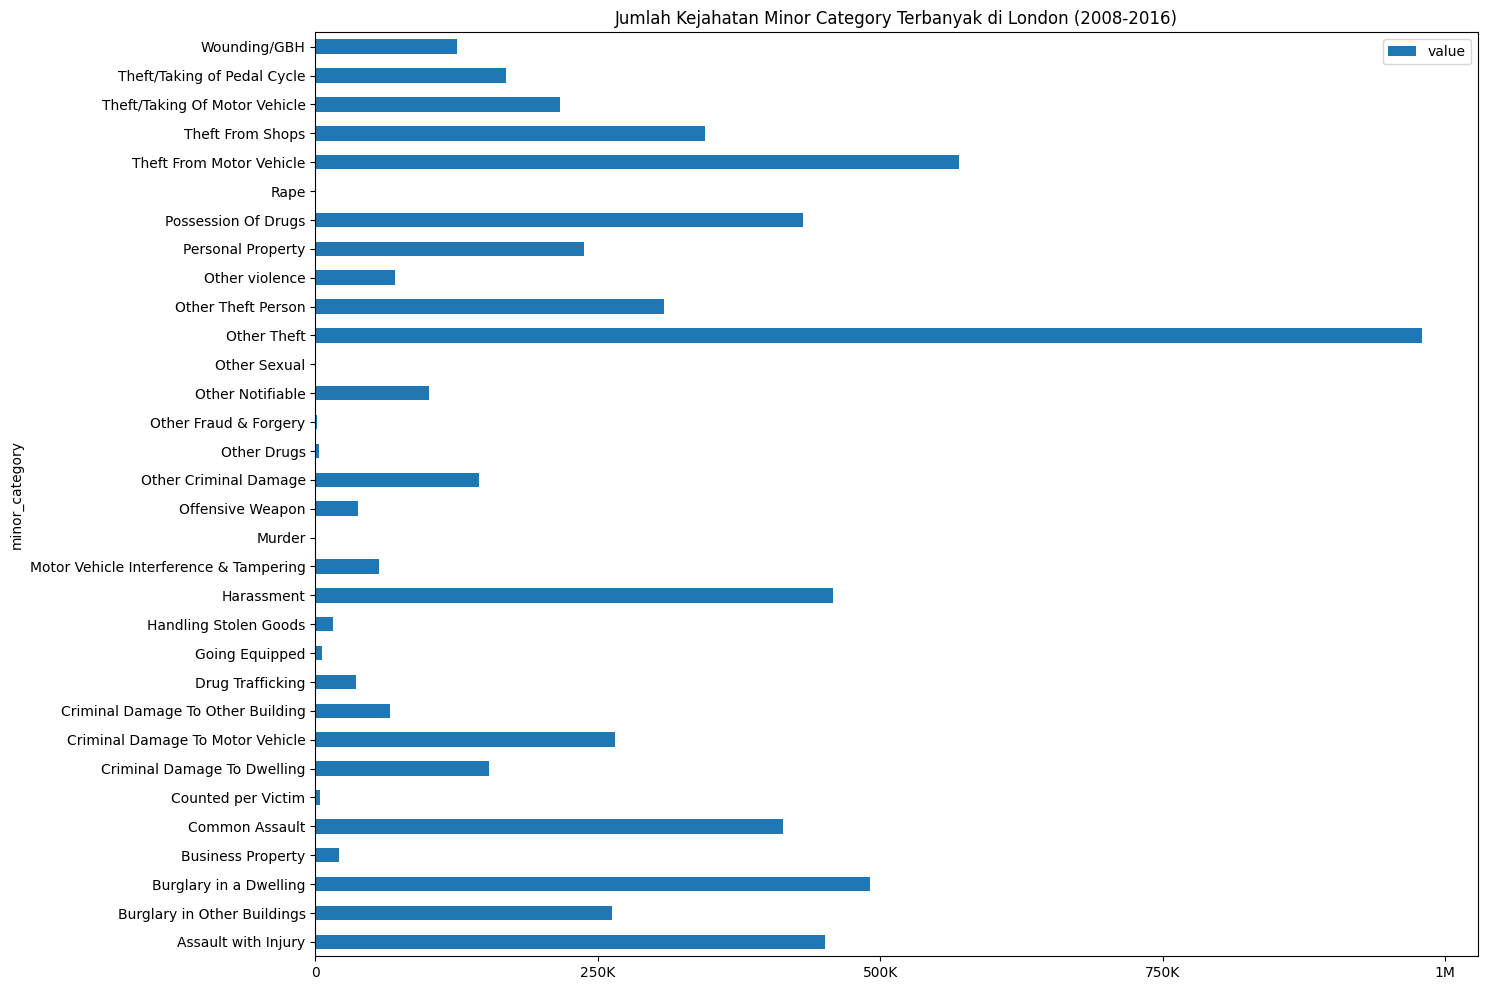

In [16]:
dataminor.plot.barh(figsize = (15, 12),
                         title = "Jumlah Kejahatan Minor Category Terbanyak di London (2008-2016)")

plt.xticks(ticks=[0, 250000, 500000, 750000, 1000000], labels=['0', '250K', '500K', '750K', '1M'])
plt.show()

Sesuai tabel dan bar chart diatas, dapat dilihat bahwa dari 32 kasus yang ada pada kategori minor menurut data London crime by LSOA, Other Theft memiliki jumlah laporan bulanan yang paling banyak selama tahun 2008 sampai 2016 yaitu sebesar 980.085, disusul oleh kasus Theft From Motor Vehicle dengan jumlah 569.956. Sedangkan yang paling sedikit terjadi adalah Rape yaitu sebanyak 268.

## Histogram

Theft and Handling             3564
Violence Against the Person    2700
Criminal Damage                1188
Drugs                           756
Burglary                        540
Robbery                         540
Other Notifiable Offences       432
Name: major_category, dtype: int64


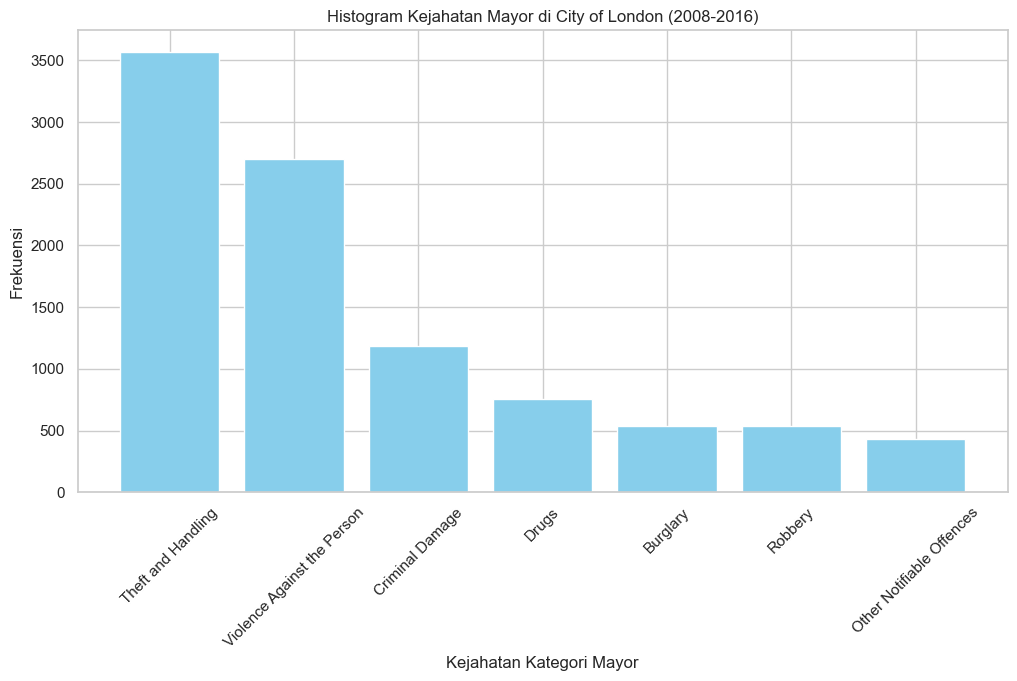

In [35]:
data_city_of_london = data[data['borough'] == 'City of London']

# Menghitung jumlah kejahatan per kategori mayor
crime_counts = data_city_of_london['major_category'].value_counts().sort_values(ascending=False)
print(crime_counts)

# Membuat histogram menggunakan matplotlib
plt.figure(figsize=(12, 6))
plt.bar(crime_counts.index, crime_counts.values, color='skyblue')
plt.xlabel('Kejahatan Kategori Mayor')
plt.ylabel('Frekuensi')
plt.title('Histogram Kejahatan Mayor di City of London (2008-2016)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Dari histogram diatas didapat bahwa pada penduduk kota City of London pada tahun 2008 - 2016 paling banyak mengalami kejahatan mayor dalam bentuk Thief and handling, yang kemudian diikuti dengan Violence Against the Person, dan Criminal Damage. Sedangkan kejahatan mayor lain berada dalam rentang yang serupa.

## Area Plot

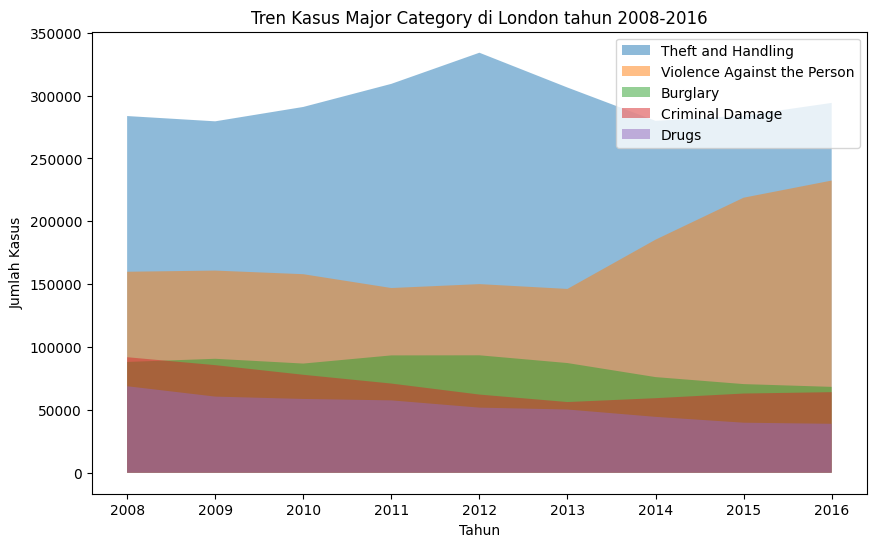

In [18]:
#mengubah kolom 'year' menjadi tipe data datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

#membuat grup data berdasarkan 'major_category' dan 'year'
data_by_category_year = data.groupby(['major_category', pd.Grouper(key='year', freq='1Y')]).sum()

#mengambil 5 kategori utama dengan jumlah kasus terbanyak
top_categories = data.groupby('major_category').sum().sort_values(by='value', ascending=False).head()['value'].index

#membuat area plot untuk tiap kategori utama
plt.figure(figsize=(10, 6))
for category in top_categories:
    plt.fill_between(data_by_category_year.loc[category].index.year, data_by_category_year.loc[category]['value'], alpha=0.5)

#menambahkan label pada sumbu x dan y, dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.title('Tren Kasus Major Category di London tahun 2008-2016')

#menampilkan plot
plt.legend(top_categories)
plt.show()


1. Berdasarkan area plot diatas dapat kita lihat bahwa akumulasi kelima kategori kejahatan mayor ini cenderung meningkat dan cenderung menurun dari tahun 2008 sampai 2012.
2. Pada kasus Theft and Handling memiliki kenaikan ditahun 2012 dan hampir mencapai titik 350.000, namun mengalami penurunan di tahun 2014 dan kembali meningkat di tahun 2016.
3. Pada kasus Violence Against the Person yang mengalami kenaikan drastis di tahun 2013 ke tahun 2016 mencapai nilai 240.000an.
4. Pada kasus Burglary cenderung stabil diawal, lalu sedikit meningkat, dan mengalami sedikit penurunan.
5. Pada kasus Criminal Damage mengalami penurunan diawal hampir mencapai titik 50.000 lalu kembali mengalami penaikan walau sedikit.
6. Pada kasus Drugs dari tahun 2008 sampai dengan 2016 cenderung mengalami penurunan.

## Box Plot

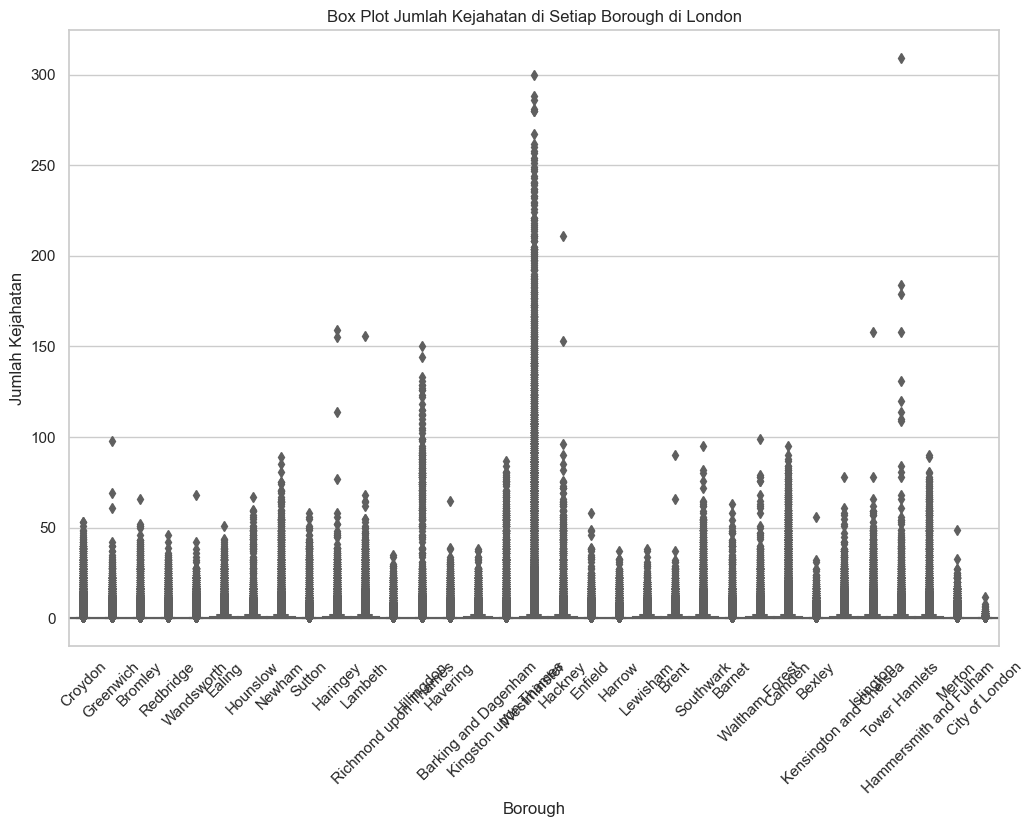

In [22]:
# Mengatur gaya plot menggunakan seaborn
sns.set(style="whitegrid")

# Membuat box plot menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='borough', y='value', palette='Set3', width=1)
plt.xlabel('Borough')
plt.ylabel('Jumlah Kejahatan')
plt.title('Box Plot Jumlah Kejahatan di Setiap Borough di London')
plt.xticks(rotation=45)
plt.show()


Box plot menunjukkan bahwa median jumlah kejahatan di Barking and Dagenham berada pada tingkat yang tinggi. Ini mengindikasikan adanya permasalahan kejahatan yang signifikan di borough tersebut. Rentang nilai (interquartile range) pada box plot juga relatif lebar, menunjukkan variabilitas yang cukup tinggi dalam jumlah kejahatan. Selain itu, terdapat beberapa outliers yang menandakan adanya kejahatan yang sangat tinggi di beberapa kejadian tertentu.

Box plot juga menunjukkan bahwa median jumlah kejahatan di Tower Hamlets lebih rendah daripada Barking and Dagenham, tetapi masih relatif tinggi dibandingkan dengan borough-borough lainnya. Rentang nilai pada box plot juga cenderung lebar, menunjukkan adanya variasi jumlah kejahatan yang signifikan. Terdapat beberapa outliers yang menunjukkan kejahatan yang mencolok di beberapa kejadian tertentu.

City of London memiliki median jumlah kejahatan di City of London relatif rendah dibandingkan dengan borough-borough lainnya. Rentang nilai pada box plot juga lebih sempit, menunjukkan variabilitas jumlah kejahatan yang lebih rendah. Terdapat beberapa outliers yang menandakan adanya kejahatan yang lebih tinggi dari biasanya di beberapa kejadian tertentu.

## Scatter Plot

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


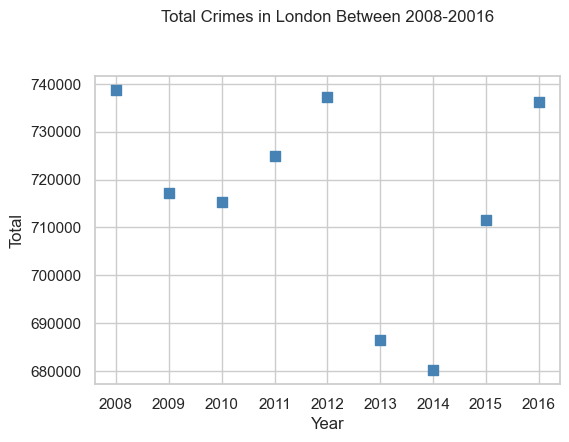

In [73]:
datayear = data.groupby('year').sum()[['value']]
datayear.reset_index('year', inplace=True)
datayear.plot(kind='scatter', x='year', y='value', figsize=(6,4), color = 'steelblue', marker= 's', s=50)
plt.title('Total Crimes in London Between 2008-2016', y=1.15)
plt.ylabel('Total')
plt.xlabel('Year')

plt.show()

Berdasarkan plot diatas, diketahui bahwaangka kejahatan tertinggi di london berada pada tahun 2008. Kemudian angka kejahatan terendah di london berada pada tahun 2014, dan angka kejahatan yang mengalami kenaikan yang cukup signifikan ada pada tahun 2014 ke tahun 2015.

## Word Clouds

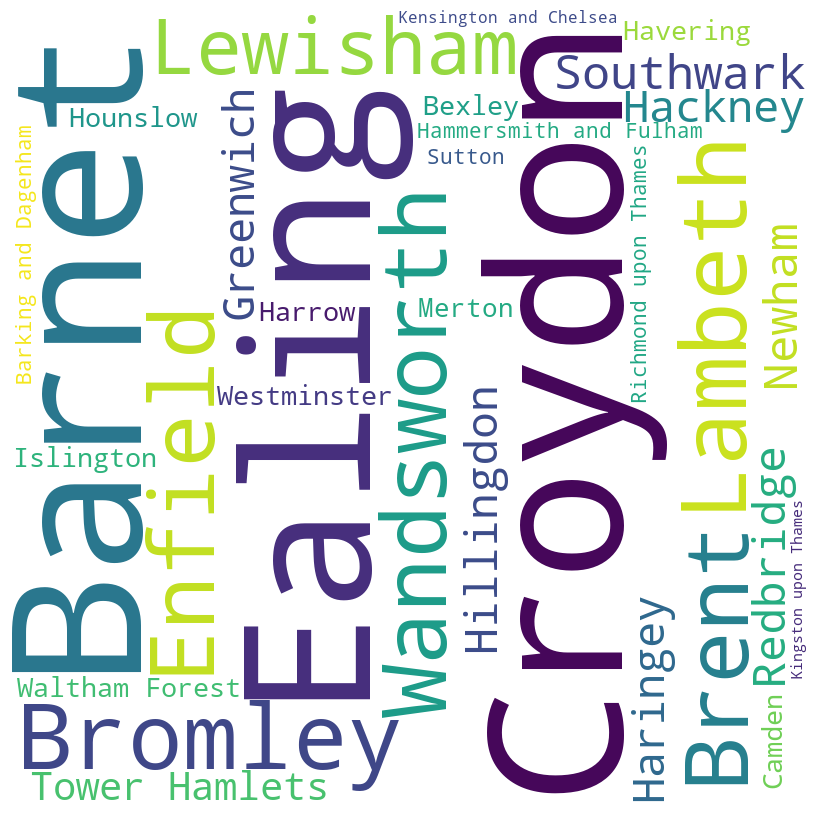

In [46]:
#Berdasarkan borough
crime_count = data.groupby(['borough']).size().reset_index(name='counts')

#wordcloud berdasarkan borough
text = dict(zip(crime_count['borough'], crime_count['counts']))
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate_from_frequencies(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Overall Analysis

Adapun kesimpulan dari visualisasi data diatas adalah:
1. Bahwa total angka kejahatan dari tahun 2008 sampai 2016 bersifat fluktuatif. Dimulai dari tahun 2015 mengalami kenaikan yang cukup signifikan. 
2. Theft and Handling terdata dalam kategori bahwa Theft and Handling adalah kejahatan tertinggi atau sering terjadi yaitu 41.3% (atau sejumlah 2.661.861 kasus), dan diikuti Violence Against the Person yang mengambil tempat kedua dengan persentase 24.2% (atau sejumlah 1.558.081 kasus). Sedangkan Sexual Offences menjadi kategori data kejahatan terendah dengan presentase 0.02% (atau sejumlah 1.273 kasus).
3. Dari data tersebut diketahui Westminster adalah wilayah yang memiliki data tingkat kejahatan tertinggi di London dengan jumlah kasus sebanyak 455028, sedangkan city of london terdata menjadi wilayah yang aman karena memiliki data terendah dengan jumlah kasus sebanyak 780 kasus.
4. Akumulasi kelima kategori kejahatan mayor yang merupakan trend kejahatan mayor di kota london yaitu kasus Theft and Handling, kasus Violence Against the Person, kasus Burglary, Criminal Damage, Drugs cenderung meningkat dan cenderung menurun dari tahun 2008 sampai 2012. 
5. Sedangkan untuk minor category crime yang terjadi di kota london,  Other Theft memiliki jumlah laporan bulanan yang paling banyak selama tahun 2008 sampai 2016 yaitu sebesar 980.085, disusul oleh kasus Theft From Motor Vehicle dengan jumlah 569.956. Sedangkan yang paling sedikit terjadi adalah Rape yaitu sebanyak 268.
